
# Laboratorio 1: Introducción a la Programación Lineal con Python

La Programación Lineal (PL) es una técnica de optimización que busca maximizar o minimizar una función objetivo, sujeta a restricciones lineales. En Python, existen varias herramientas que permiten resolver problemas de programación lineal de manera eficiente. En esta sesión de laboratorio exploraremos algunas de las bibliotecas más utilizadas y realizaremos una introducción a **Pyomo**, una de las más potentes para la optimización matemática.


## Bibliotecas para resolver problemas de Programación Lineal en Python

Algunas de las principales bibliotecas que se pueden utilizar para resolver problemas de Programación Lineal en Python incluyen:

- **SciPy**: Ofrece funciones básicas para resolver problemas de optimización, incluida la programación lineal.
- **PuLP**: Una biblioteca especializada en resolver problemas de programación lineal.
- **Gurobi**: Un solver comercial, pero con una versión gratuita para uso académico.
- **Cplex**: Otro solver comercial ampliamente utilizado.
- **Pyomo**: Un potente entorno de modelado para problemas de optimización, que soporta múltiples solvers como Gurobi, Cplex, GLPK, entre otros.

En esta sesión de laboratorio nos enfocaremos en **Pyomo**, ya que ofrece una interfaz flexible y es compatible con una amplia gama de solvers.

## Introducción a Pyomo

**Pyomo** es un paquete de Python que permite definir y resolver problemas de optimización de forma declarativa. Es ampliamente utilizado en la academia y la industria debido a su flexibilidad para modelar problemas complejos de optimización, incluyendo programación lineal, entera y no lineal.

A continuación, explicaremos cómo instalar y utilizar Pyomo para resolver problemas de programación lineal.

### Instalación de Pyomo

**Paso 1. Instalar Pyomo:** Para instalar Pyomo, puedes utilizar `pip`:

```python
pip install pyomo
```

**Paso 2. Instalar GLPK:** Además de Pyomo, necesitarás un solver para resolver los problemas de optimización. Un solver gratuito y de código abierto que se puede utilizar es **GLPK**. Puedes descargar GLPK en el [siguiente enlace](https://sourceforge.net/projects/winglpk/). Para instalar GLPK puedes consultar las instrucciones de su [sitio web oficial](https://www.gnu.org/software/glpk/) o utilizando un paquete administrador como `apt` en Linux.


### Ejemplo básico de Programación Lineal con Pyomo

Consideremos el siguiente problema de programación lineal:

$$
\begin{array}{lrlrl}
    \text{maximizar }   & 40x_1 + 30x_2   &       &    \\
    \text{ \, sujeto a }   &   2x_1 + 3x_2 \; & \leqslant  &\; {} 60\\
                        &   x_1 + 2x_2\; & \leqslant  &\; 40\\
                        & x_1,x_2 \;& \geqslant  &\; {} 0
\end{array}
$$

Realicemos primero la resolución gráfica del problema. 




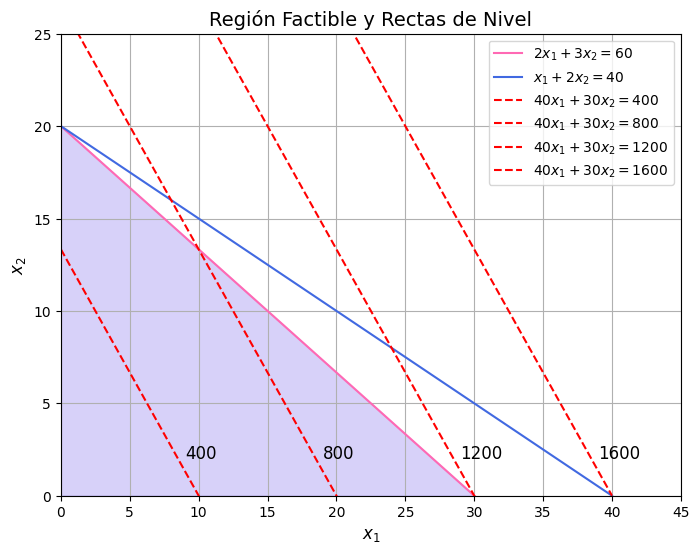

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones de las restricciones
def restriccion1(x1):
    return (60 - 2*x1) / 3

def restriccion2(x1):
    return (40 - x1) / 2

# Definir el rango para x1
x1 = np.linspace(0, 40, 400)

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficamos las restricciones
plt.plot(x1, restriccion1(x1), label=r'$2x_1 + 3x_2 = 60$', color='hotpink')
plt.plot(x1, restriccion2(x1), label=r'$x_1 + 2x_2 = 40$', color='royalblue')

# Sombrear la región factible
x = np.linspace(0, 40, 400)
y1 = restriccion1(x)
y2 = restriccion2(x)
plt.fill_between(x, np.minimum(y1, y2), 0, where=(y1 >= 0) & (y2 >= 0), color='mediumslateblue', alpha=0.3)

# Graficar las rectas de nivel (función objetivo)
rectas_nivel = [400, 800, 1200, 1600]
puntos = [(9, 2), (19, 2), (29, 2), (39, 2)]

for Z, (x_pos, y_pos) in zip(rectas_nivel, puntos):
    y = (Z - 40*x1) / 30
    plt.plot(x1, y, label=f'$40x_1 + 30x_2 = {Z}$', linestyle='--', color='red')
    # Colocar las etiquetas en los puntos solicitados
    plt.text(x_pos, y_pos, str(Z), fontsize=12, color='black')


# Límites y etiquetas
plt.xlim(0, 45)
plt.ylim(0, 25)
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)

# Añadir leyenda
plt.legend(loc='upper right')

# Título
plt.title('Región Factible y Rectas de Nivel', fontsize=14)

# Mostrar la gráfica
plt.grid(True)
plt.show()


Como se puede observar la solución óptima del problema es $x_1^*=30$ y $x_2^*=0$, donde la función objetivo alcaza su valor máximo de $1200$.

Nota: para poder graficar el problema se necesitan instalar las bibliotecas **Numpy** y **Matplotlib**.

```python
pip install numpy
```

```python
pip install matplotlib
```


#### Definición del problema en Pyomo

Este es un problema clásico de maximización en programación lineal. A continuación, veremos cómo resolverlo utilizando Pyomo. Para ello, se muestra el código para definir y resolver este problema utilizando Pyomo:

In [2]:

# Importar Pyomo
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Definir las variables
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

# Definir la función objetivo
model.obj = Objective(expr=40*model.x1 + 30*model.x2, sense=maximize)

# Definir las restricciones
model.constraint1 = Constraint(expr=2*model.x1 + 3*model.x2 <= 60)
model.constraint2 = Constraint(expr=model.x1 + 2*model.x2 <= 40)

# Resolver el problema
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar los resultados
model.x1.display()
model.x2.display()
model.obj.display()


x1 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  30.0 :  None : False : False : NonNegativeReals
x2 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.0 :  None : False : False : NonNegativeReals
obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 1200.0



En este ejemplo:

- Definimos un modelo concreto `ConcreteModel` que contiene las variables, la función objetivo y las restricciones del problema.
- Empleamos la función `Var` para definir las variables de decisión.
- Utilizamos la función `Objective` para definir la función que queremos maximizar.
- Las restricciones se definen utilizando la clase `Constraint`.
- Finalmente, se resuelve el problema utilizando un solver compatible, como **GLPK** en este caso.

 Como se puede observar se obtiene la misma solución que empleando el método gráfico: $x^*_1=30$, $x^*_2=0$ y $f(x_1^*,x_2^*)=1200$.
 
 Pyomo es una herramienta poderosa que no solo permite resolver problemas simples, sino que también es muy flexible para problemas de mayor complejidad y con múltiples restricciones y variables. En las siguientes sesiones de laboratorio, aprenderemos a resolver problemas más complejos, incluyendo problemas de programación entera y no lineal.


### Ejercicio de Programación Lineal con Pyomo

Se desea producir pintura verde en dos tonalidades, Verde Manzana y Verde Pino, mezclando pintura azul y amarilla en distintas proporciones. Un litro de pintura Verde Manzana necesita 0.3 litros de azul y 0.7 litros de amarillo, mientras que un litro (L) de pintura Verde Pino necesita 0.5 L de azul y 0.5 L de amarillo. Actualmente se dispone de 20 L de pintura azul y 28 L de pintura amarilla. El beneficio por litro de la pintura Verde Manzana es de 1€, y por litro de pintura Verde Pino es de 1.20€. No se pueden producir más de 30 L de pintura Verde Manzana. ¿Cuántos litros de pintura Verde Manzana y Verde Pino debe producir para maximizar sus beneficios? ¿Cuál será el beneficio obtenido? Utilice Pyomo para resolver el problema

## Variables de decisión.

$$
x_1 \equiv \text{ cantidad de verde manzana} \\
x_2 \equiv \text{ cantidad de verde pino} \\
$$

## Función objetivo y restricciones.

$$
\begin{array}{lrlrl}
    \text{maximizar }   & x_1 + 1.20x_2   &       &    \\[5pt]
    \text{ \, sujeto a }   &   0.3x_1 + 0.5x_2 \; & \leqslant  &\; {} 20\\
                        &   0.7x_1 + 0.5x_2\; & \leqslant  &\; 28\\
                        &   x_1\; & \leqslant  &\; 30\\
                        & x_1,x_2 \;& \geqslant  &\; {} 0\\[10pt]
\end{array}
$$



In [3]:
model = ConcreteModel()

model.x1 = Var(within=NonNegativeReals) # x1 = cantidad de litros de verde manzada
model.x2 = Var(within=NonNegativeReals) # x2 = cantidad de litros de verde pino

# Definir la función objetivo
model.obj = Objective(expr=model.x1 + 1.20*model.x2, sense=maximize)

# Definir las restricciones
model.constraint1 = Constraint(expr=0.3*model.x1 + 0.5*model.x2 <= 20)
model.constraint2 = Constraint(expr=0.7*model.x1 + 0.5*model.x2 <= 28)
model.constraint3 = Constraint(expr=model.x1 <= 30)

# Resolver el problema
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar los resultados
model.x1.display()
model.x2.display()
model.obj.display()

x1 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  20.0 :  None : False : False : NonNegativeReals
x2 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  28.0 :  None : False : False : NonNegativeReals
obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True :  53.6
